In [2]:
import os; os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [3]:
from tqdm.auto import tqdm

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
# import plotly.express as px
from tensorflow.keras import layers
from pickle import dump, load
from pathlib import Path

In [4]:
(Xtrain, Ytrain), (Xtest, Ytest) = tf.keras.datasets.mnist.load_data()
Xtrain = Xtrain / 255
Xtest = Xtest / 255
Xtrain = np.expand_dims(Xtrain,-1)
Xtest = np.expand_dims(Xtest,-1)

In [5]:
big_shape = (56,56)

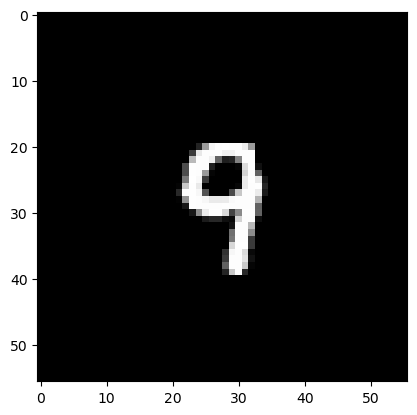

In [6]:
Xtrain_big = np.zeros((Xtrain.shape[0],*big_shape,1))
Xtrain_big[:,14:14+28,14:14+28] = Xtrain[:,:,:]

Xtest_big = np.zeros((Xtest.shape[0],*big_shape,1))
Xtest_big[:,14:14+28,14:14+28] = Xtest[:,:,:]

plt.imshow(Xtrain_big[520].squeeze(), cmap = "gray")
plt.show()

In [8]:
# clasificador = tf.keras.models.Sequential([
#     layers.Conv2D(32, (3,3), activation = "relu", padding = "same" ,input_shape = Xtrain_big[0].shape),#56x56
#     layers.MaxPooling2D(2),
#     layers.Flatten(),
#     layers.Dense(10, activation  = "softmax")
# ])

# clasificador.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# history = clasificador.fit(Xtrain_big, Ytrain, batch_size=128, epochs=10, validation_data = (Xtest_big, Ytest))

Epoch 1/10
469/469 [==============================] - 13s 27ms/step - loss: 0.3597 - accuracy: 0.9027 - val_loss: 0.1511 - val_accuracy: 0.9586
Epoch 2/10
469/469 [==============================] - 12s 26ms/step - loss: 0.1325 - accuracy: 0.9630 - val_loss: 0.0997 - val_accuracy: 0.9717
Epoch 3/10
469/469 [==============================] - 12s 26ms/step - loss: 0.0937 - accuracy: 0.9735 - val_loss: 0.0796 - val_accuracy: 0.9766
Epoch 4/10
469/469 [==============================] - 12s 26ms/step - loss: 0.0760 - accuracy: 0.9781 - val_loss: 0.0683 - val_accuracy: 0.9789
Epoch 5/10
469/469 [==============================] - 12s 26ms/step - loss: 0.0661 - accuracy: 0.9807 - val_loss: 0.0738 - val_accuracy: 0.9766
Epoch 6/10
469/469 [==============================] - 12s 26ms/step - loss: 0.0578 - accuracy: 0.9829 - val_loss: 0.0623 - val_accuracy: 0.9799
Epoch 7/10
469/469 [==============================] - 12s 26ms/step - loss: 0.0518 - accuracy: 0.9849 - val_loss: 0.0597 - val_accuracy:

In [9]:
# Guardar el Modelo
#clasificador.save('clasificador_NOinv_basico.h5')

# Recrea exactamente el mismo modelo solo desde el archivo
clasificador = tf.keras.models.load_model('clasificador_NOinv_basico.h5')

In [10]:
def var_pos(X, desp_h, desp_v):
  X_big = np.zeros((X.shape[0],*big_shape,1))
  X_big[:,14+desp_v:14+28+desp_v,14+desp_h:14+28+desp_h] = X[:,:,:]
  return X_big

In [11]:
def out_mapas(model,X):
  capas = model.layers
  salida = [X]

  for capa in capas:
    salida_capa = capa(salida[-1]).numpy()
    salida.append(salida_capa)
  
  return salida

# MÉTRICAS


In [12]:
 
desps_h = range(-7,8)
desps_v = range(-7,8)
metricas = {}
mapas_caracteristicas = {}
 
for desp_h in tqdm(desps_h):
    for desp_v in tqdm(desps_v):
        Xtrain_desplazado = var_pos(Xtrain, desp_h = desp_h, desp_v = desp_v)
        Xtest_desplazado = var_pos(Xtest, desp_h = desp_h, desp_v = desp_v)
        met_train = clasificador.evaluate(Xtrain_desplazado, Ytrain, batch_size=10, verbose=0, return_dict=True)
        met_test = clasificador.evaluate(Xtest_desplazado, Ytest, batch_size=10, verbose=0, return_dict=True)
        metricas[(desp_h, desp_v)] = {"Train":met_train, "Test":met_test}
        


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

In [14]:
# Escribir 
# with open("metricas_traslacion_NOinv_basico.pkl", "wb") as f:
#         dump(metricas, f)

# Leer
with open("metricas_traslacion_NOinv_basico.pkl", "rb") as f:
        metricas = load(f)


In [15]:
df_metricas = pd.DataFrame.from_dict(metricas, orient="index").reset_index()
df_metricas.columns = ["desp_h","desp_v", "Train", "Test"]
df_metricas.head()

,desp_h,desp_v,Train,Test
0,-7,-7,"{'loss': 16.242578506469727, 'accuracy': 0.072...","{'loss': 16.103836059570312, 'accuracy': 0.068..."
1,-7,-6,"{'loss': 14.917386054992676, 'accuracy': 0.054...","{'loss': 14.810968399047852, 'accuracy': 0.051..."
2,-7,-5,"{'loss': 13.57807731628418, 'accuracy': 0.0492...","{'loss': 13.488665580749512, 'accuracy': 0.046..."
3,-7,-4,"{'loss': 12.088266372680664, 'accuracy': 0.069...","{'loss': 12.073224067687988, 'accuracy': 0.067..."
4,-7,-3,"{'loss': 10.439056396484375, 'accuracy': 0.118...","{'loss': 10.465564727783203, 'accuracy': 0.114..."


In [16]:
TrainLoss = []
TrainAccuracy = []
TestLoss = []
TestAccuracy = []

for key in metricas.keys():
    TrainLoss.append(metricas[key]["Train"]["loss"])
    TrainAccuracy.append(metricas[key]["Train"]["accuracy"])
    TestLoss.append(metricas[key]["Test"]["loss"])
    TestAccuracy.append(metricas[key]["Test"]["accuracy"])
    

In [17]:
df_metricas["TrainLoss"] = TrainLoss
df_metricas["TrainAccuracy"] = TrainAccuracy
df_metricas["TestLoss"] = TestLoss
df_metricas["TestAccuracy"] = TestAccuracy

df_metricas = df_metricas.drop("Train", axis = 1)
df_metricas = df_metricas.drop("Test", axis = 1)

In [18]:
df_metricas

,desp_h,desp_v,TrainLoss,TrainAccuracy,TestLoss,TestAccuracy
0,-7,-7,16.242579,0.072667,16.103836,0.0685
1,-7,-6,14.917386,0.054517,14.810968,0.0515
2,-7,-5,13.578077,0.049233,13.488666,0.0461
3,-7,-4,12.088266,0.069033,12.073224,0.0675
4,-7,-3,10.439056,0.118900,10.465565,0.1145
...,...,...,...,...,...,...
220,7,3,14.327475,0.104233,14.213990,0.1120
221,7,4,15.261430,0.053100,15.202503,0.0551
222,7,5,15.830417,0.065733,15.757747,0.0685
223,7,6,16.533777,0.100833,16.384130,0.1035


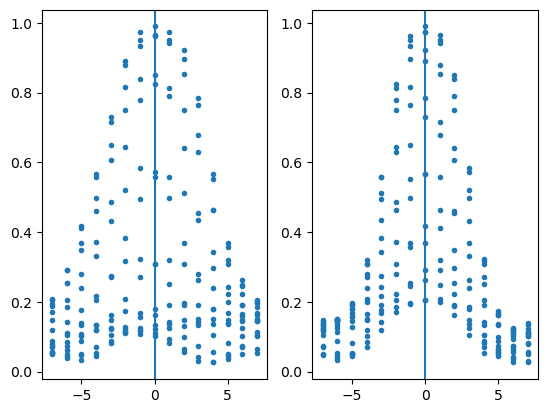

In [23]:
fig, axes = plt.subplots(1,2)
axes[0].plot(df_metricas["desp_h"], df_metricas["TrainAccuracy"], '.')
axes[0].axvline(0)
axes[1].plot(df_metricas["desp_v"], df_metricas["TrainAccuracy"], '.')
axes[1].axvline(0)
plt.show()

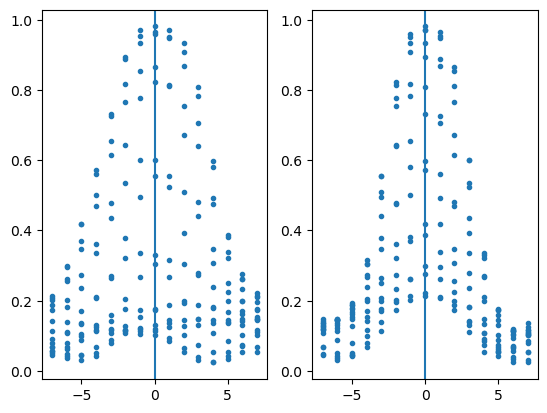

In [19]:
fig, axes = plt.subplots(1,2)
axes[0].plot(df_metricas["desp_h"], df_metricas["TestAccuracy"], '.')
axes[0].axvline(0)
axes[1].plot(df_metricas["desp_v"], df_metricas["TestAccuracy"], '.')
axes[1].axvline(0)
plt.show()

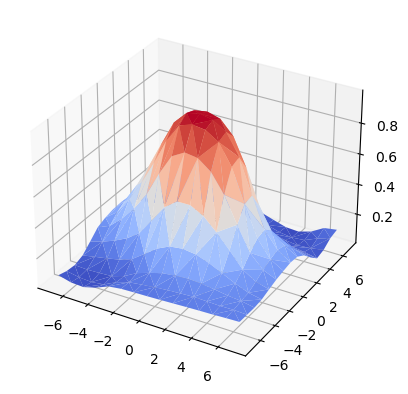

In [22]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_trisurf(df_metricas["desp_h"], df_metricas["desp_v"], df_metricas["TrainAccuracy"], cmap="coolwarm")
plt.savefig("surface", dpi = 300)
plt.show()

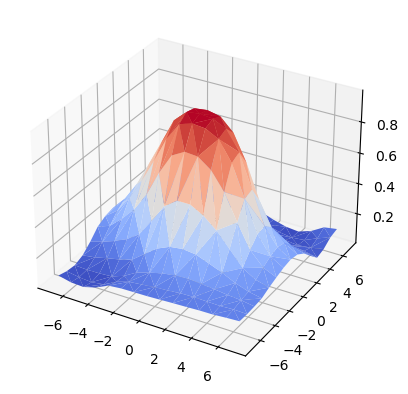

In [21]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_trisurf(df_metricas["desp_h"], df_metricas["desp_v"], df_metricas["TestAccuracy"], cmap="coolwarm")
plt.savefig("surface", dpi = 300)
plt.show()

# MAPAS DE CARACTERÍSTICAS

In [25]:
select = np.array([0,1,2,3,4,7,8,11,18,61]) # Una imagen con cada número
Xtest_selec = Xtest[select]
Ytest_selec = Ytest[select]

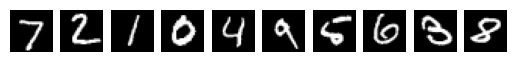

In [26]:
fig, axes = plt.subplots(1,10,squeeze=False)
axes[0,0].set_ylabel("Xtest")
for i in range(10):
    axes[0,i].imshow(Xtest_selec[i].squeeze(), cmap="gray")
    axes[0,i].axis("off")
    

In [27]:
mapas_caracteristicas = {}
desps_h = range(-7,8)
desps_v = range(-7,8)

for desp_h in tqdm(desps_h):
  for desp_v in tqdm(desps_v):
    Xtest_desplazado = var_pos(Xtest_selec, desp_h = desp_h, desp_v = desp_v)
    mapas_test = out_mapas(clasificador,Xtest_desplazado)
    mapas_caracteristicas[(desp_h, desp_v)] = mapas_test

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

In [28]:
for mp in mapas_caracteristicas[(-7,-7)]: print(mp.shape)

(10, 56, 56, 1)
(10, 56, 56, 32)
(10, 28, 28, 32)
(10, 25088)
(10, 10)


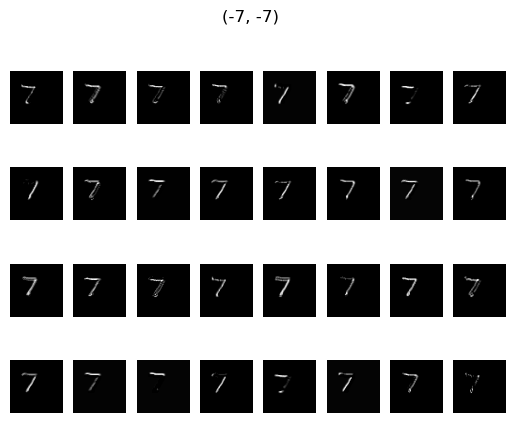

In [29]:
for desps, outputs in mapas_caracteristicas.items():
    for image in range(len(outputs[1])):
        fig, axes = plt.subplots(4,8)
        axes = axes.flatten()
        for i in range(outputs[1][image].shape[-1]):
            axes[i].imshow(outputs[1][image,:,:,i].squeeze(), cmap="gray")
            axes[i].axis("off")
        plt.suptitle(desps)
        plt.show()
        break
    break
        
    

In [ ]:
desps_h = range(-7,8)
desps_v = range(-7,8)
dist_0 = {}
list_df = []
AllImages = {}

for image in Ytest_selec:
    for filtro in range(32):
        for desp_h in desps_h:
            for desp_v in tqdm(desps_v):
                dist = np.array(mapas_caracteristicas[0,0][1][image,:,:,filtro]) - np.array(mapas_caracteristicas[desp_h,desp_v][1][image,:,:,filtro])
                dist_0[(desp_h, desp_v)] = round(np.sum(np.abs(dist)),2)
        df = pd.DataFrame.from_dict(dist_0, orient="index")
        list_df.append(df)
    TablaCompleta = pd.concat(list_df, axis = 1)
    AllImages[image] = TablaCompleta
    break

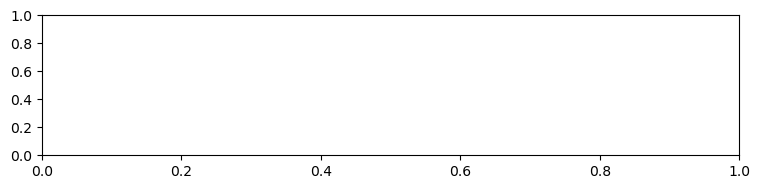

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

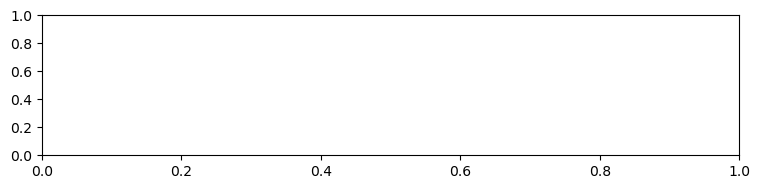

In [31]:
plt.figure(figsize=(9,4))
plt.subplot(2,1,1)
plt.show(mapas_caracteristicas[7,7][2][1])
plt.axis("off")
plt.subplot(2,1,2)
plt.show(mapas_caracteristicas[0,0][2][1])
plt.axis("off")
plt.show()

TypeError: Invalid shape (1400, 28, 32) for image data

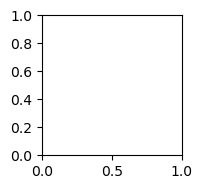

In [32]:
plt.figure(figsize=(9,4))
plt.subplot(2,1,1)
plt.matshow(np.repeat(mapas_caracteristicas[7,7][2][1], 50, axis=0), fignum=0)
plt.axis("off")
plt.subplot(2,1,2)
plt.matshow(np.repeat(mapas_caracteristicas[0,0][2][1], 50, axis=0), fignum=0)
plt.axis("off")
plt.show()